<a href="https://colab.research.google.com/github/Fatis092/repo52/blob/main/Twijr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics -q

In [ ]:
!shell
!pip install --upgrade ultralytics

/bin/bash: line 1: shell: command not found


In [26]:
temp_dict = {}

for i in range(10):
    if id not in temp_dict:
          temp_dict[id] = [1]
          print(temp_dict[id])
    else:
          temp_dict.update({id: temp_dict.get(id) + 1})
          print(temp_dict[id])



[1]


TypeError: can only concatenate list (not "int") to list

In [ ]:
import matplotlib.pyplot as plt

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.


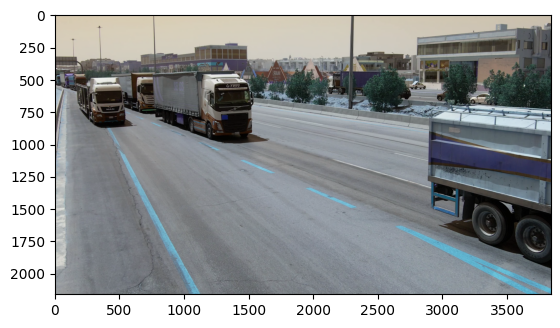


0: 384x640 3 trucks, 148.5ms
Speed: 3.6ms preprocess, 148.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


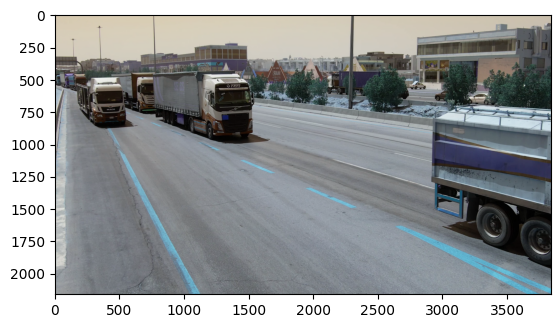


0: 384x640 3 trucks, 193.4ms
Speed: 4.4ms preprocess, 193.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


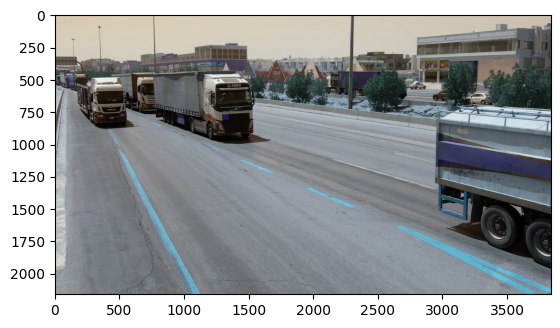


0: 384x640 3 trucks, 197.5ms
Speed: 4.5ms preprocess, 197.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


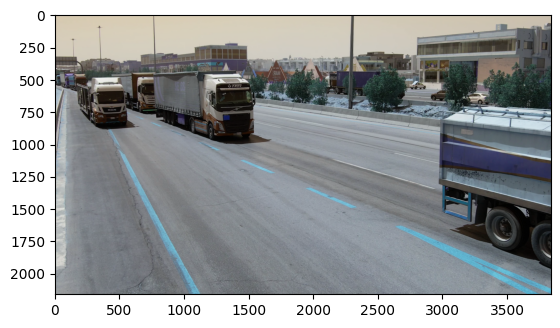


0: 384x640 3 trucks, 202.3ms
Speed: 5.7ms preprocess, 202.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


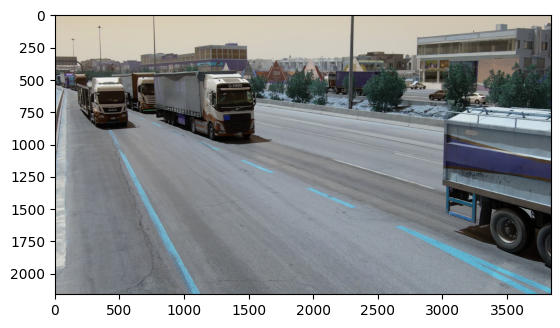


0: 384x640 3 trucks, 275.9ms
Speed: 4.5ms preprocess, 275.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


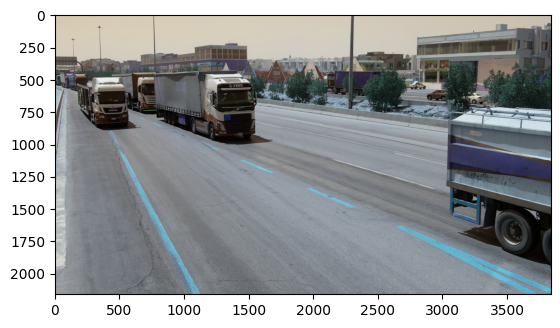


0: 384x640 3 trucks, 200.2ms
Speed: 4.8ms preprocess, 200.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


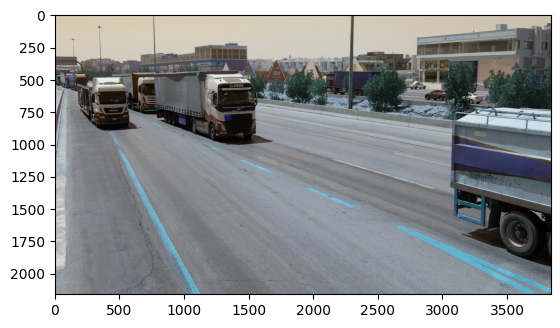


0: 384x640 3 trucks, 197.7ms
Speed: 4.4ms preprocess, 197.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


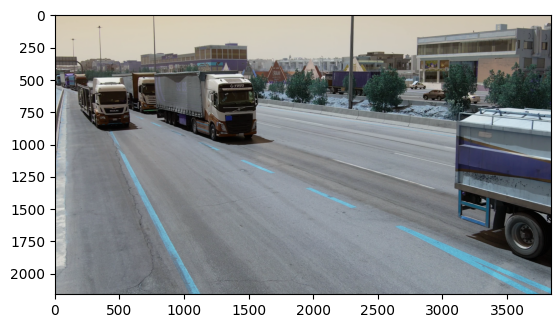


0: 384x640 3 trucks, 213.2ms
Speed: 4.4ms preprocess, 213.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


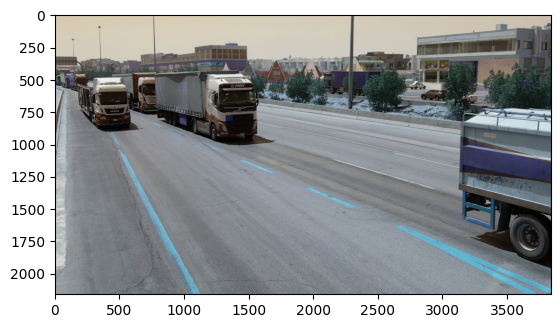


0: 384x640 3 trucks, 204.2ms
Speed: 4.0ms preprocess, 204.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


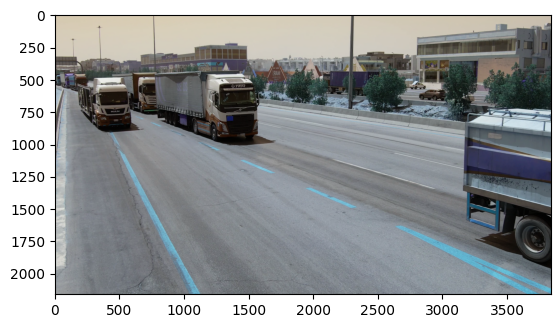


0: 384x640 3 trucks, 209.2ms
Speed: 4.3ms preprocess, 209.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


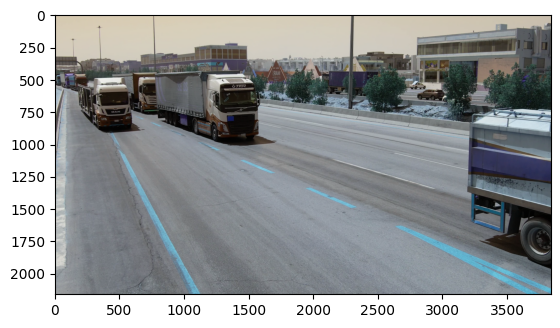


0: 384x640 3 trucks, 239.9ms
Speed: 5.8ms preprocess, 239.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


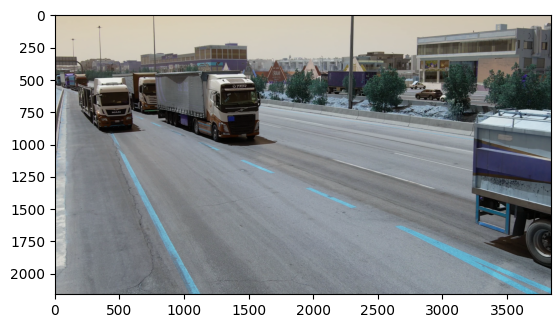


0: 384x640 3 trucks, 268.0ms
Speed: 4.2ms preprocess, 268.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


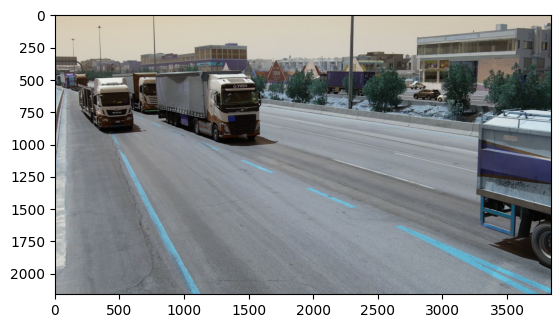


0: 384x640 3 trucks, 219.9ms
Speed: 5.5ms preprocess, 219.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


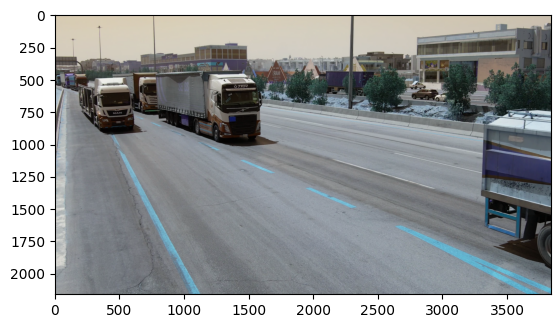


0: 384x640 3 trucks, 219.4ms
Speed: 5.6ms preprocess, 219.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


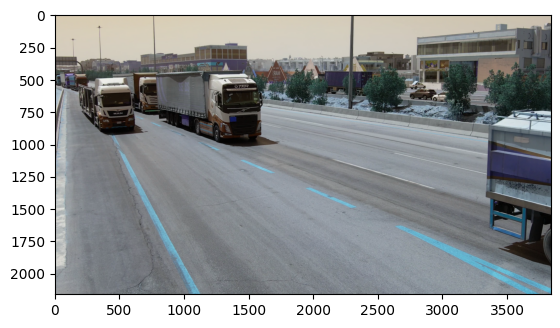


0: 384x640 3 trucks, 240.3ms
Speed: 4.3ms preprocess, 240.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


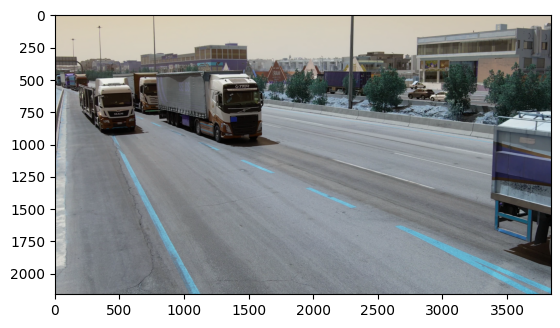


0: 384x640 2 trucks, 1 bench, 224.8ms
Speed: 4.1ms preprocess, 224.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
[1]
[1]
[1]


KeyboardInterrupt: 

In [25]:
import cv2
from IPython.display import Image, display
from ultralytics import YOLO  # Import the ultralytics library
from ultralytics.solutions import ObjectCounter  # Import the ObjectCounter class

video_path = '/content/DJI_0064.mov'  # Input video path
output_path = 'output_video.mp4'  # Output video path

# Initialize video capture and writer
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Set frame rate (adjust as needed)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
p=[(0,1250),[3000,1250]]
p2=[(0,1500),[4000,1500]]
model = YOLO('yolov8n.pt')  # Load your model
counter = ObjectCounter(names=model.names,reg_pts=p,view_img=True)  # Initialize the counter without target_classes
counter = ObjectCounter(names=model.names,reg_pts=p2,view_img=True)
# Process video frame by frame
temp_dict = {}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video has ended or there's an error.")
        break
    plt.imshow(frame)
    plt.show()
    results = model.track(frame, persist=True,show=False)  # Perform detection
    for result in results[0].boxes:
      x1, y1, x2, y2 = result.xyxy[0]
    ##########################
    # Extract bounding box coordinates as (x, y, width, height)
      x, y, width, height = result.xywh[0]

    # Extract confidence score of the detection
      confidence = result.conf[0]

    # Extract class ID of the detected object
      class_id = result.cls[0]

    # Extract tracking ID if available
      track_id = result.track_id if hasattr(result, 'track_id') else None
      center_y = y1 + y2 / 2
      center_x = x1 + x2 / 2
      id = result.cls[0]
      if 600 < center_y:
          if id not in temp_dict:
            temp_dict[id] = [1]
          else:
            temp_dict.update({id: temp_dict[id] + 1})
          val = temp_dict.get(id)
          print(val)
           if  > 2 * fps:
             plt.imshow(frame)
             plt.show()
      if 1500 < center_y:
            temp_dict[id] = [0]

  ###########################
    counter.start_counting(frame, results)
    annotated_frame = results[0].plot()
    # Write the annotated frame to the output video
    out.write(annotated_frame)




# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
#############شغلي تجربه بدال الي فوق

!pip install ultralytics
import cv2
from IPython.display import Image, display
from ultralytics import YOLO
from ultralytics.solutions import SpeedEstimator

video_path = '/content/DJI_0064.mov'

# Initialize video capture
cap = cv2.VideoCapture(video_path)

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Initialize speed estimator with the model's names
speed_estimator = SpeedEstimator(names=model.names) # Add the names argument

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video has ended or there's an error.")
        break

    results = model.track(frame, persist=True, show=False)

    # Removed the call to the non-existent update method
    # speed_estimator.update(results, frame)

    for result in results[0]:
        if result.speed == 0:
            # Display or save the frame
            display(Image(data=cv2.imencode('.jpg', frame)[1].tobytes()))
            # Or save: cv2.imwrite('zero_speed_frame.jpg', frame)
            break

cap.release()
cv2.destroyAllWindows()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


0: 384x640 3 trucks, 148.0ms
Speed: 3.9ms preprocess, 148.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 168.6ms
Speed: 4.4ms preprocess, 168.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 161.9ms
Speed: 4.3ms preprocess, 161.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 162.1ms
Speed: 3.9ms preprocess, 162.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 150.5ms
Speed: 4.7ms preprocess, 150.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 170.4ms
Speed: 4.2ms preprocess, 170.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 163.8ms
Speed: 4.0ms preprocess, 163.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 152.9ms


In [ ]:
out.release()
